In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 讀取資料集
iris = datasets.load_iris()
df_data = pd.read_csv('iris.csv')

In [ ]:
#  查看檔案
df_data

In [3]:
# 刪除 標籤ID 因為不參與 運算
df_data = df_data.drop(labels=['Id'], axis=1)

In [4]:
# 調整 種類資料 Species 的值 改成 012 ，讓決策樹可以計算
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)

In [5]:
# 檢查缺失值
print("checked missing data(NAN mount):",len(np.where(np.isnan(9))[0]))
# 移除缺失值 train=train.dropna()

checked missing data(NAN mount): 0


3) 設定 X=資料  y=標籤

In [6]:
X = df_data.drop(labels=['Class','Species'],axis=1).values
y = df_data['Class'].values

4) 切割訓練集 與 測試集

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=.3 , random_state=42)

In [8]:
print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


建立模型
- n_neighbors = k個鄰居
- p = 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離

In [9]:
# 建立KNN模型
knn = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knn.fit(X_train,y_train)
# 使用訓練資料預測分類
predicted= knn.predict(X_train)

Score評估模型

In [10]:
print('訓練集: ', knn.score(X_train, y_train))
print('測試集: ', knn.score(X_test, y_test))

訓練集:  0.9428571428571428
測試集:  1.0


# 尋找合適的K
- from sklearn import metrics

In [11]:
len(X_train)

105

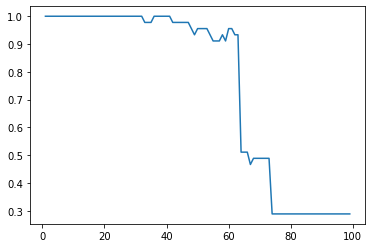

In [13]:
from sklearn import metrics

accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,100)
plt.plot(k_range, accuracy)
plt.show()

真實分類

In [ ]:
# 建立訓練集的 DataFrme
df_train=pd.DataFrame(X_train)
df_train['Class']=y_train
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test)
df_test['Class']=y_test

In [ ]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Class', data=df_train, fit_reg=False)

KNN (訓練集)預測結果

In [ ]:
df_train['Predict']=predicted
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_train, hue="Predict", fit_reg=False)
plt.show()

查看不同的K分類結果
- 為了方便視覺化我們將原有的測試集特徵使用PCA降成2維。接著觀察在不同 K 的狀況下，分類的情形為何。

In [14]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
            alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

In [15]:
def knn_model(plot_dict, X, y, k):
    #create model
    model = KNeighborsClassifier(n_neighbors=k)

    #training
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    if k in plot_dict:
        plt.subplot(plot_dict[k])
        plt.tight_layout()
        plot_decision_regions(X,y,model)
        plt.title('Plot for K: %d'%k )

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.fit_transform(X_test)

KNN 訓練集 PCA 2 features

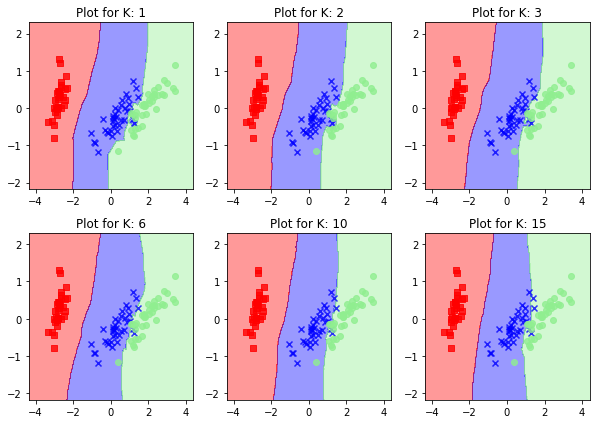

In [17]:
plt.figure(figsize=(8.5, 6))

# 調整 K
plot_dict = {1:231,2:232,3:233,6:234,10:235,15:236}
for i in plot_dict:
    knn_model(plot_dict, train_reduced, y_train, i)